In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Valens\Documents\Python Anaconda\New York City Airbnb Open Data analysis'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'AB_NYC_2019_CLEAN.pkl'))

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19 00:00:00.000000000,0.21,6,365
1,2595,Skylit Midtown Castle,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21 00:00:00.000000000,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,2018-10-04 01:47:23.910099456,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05 00:00:00.000000000,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19 00:00:00.000000000,0.10,1,0


In [6]:
df.dtypes

id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [7]:
# making sub dataframe
sub_df = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [8]:
sub_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149.0,1,9,0.21,6,365
1,225.0,1,45,0.38,2,355
2,150.0,3,0,0.00,1,365
3,89.0,1,270,4.64,1,194
4,80.0,10,9,0.10,1,0


In [9]:
sub_df.shape

(48895, 6)

### Checking an extreme check and data wrangling

In [10]:
sub_df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.755045,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.143242,20.510550,44.550582,1.597283,32.952519,131.622289
min,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:xlabel='price', ylabel='Count'>

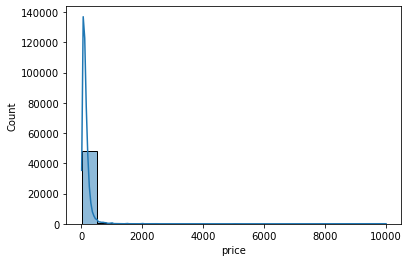

In [11]:
sns.histplot(sub_df['price'], bins=20, kde = True) # shows extreme values for 'price'

In [12]:
sub_df[sub_df['price']>1500]

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,2000.0,30,30,0.33,11,0
946,3000.0,7,0,0.00,1,365
1480,2000.0,30,59,0.71,11,364
1862,4000.0,4,0,0.00,1,83
2018,2500.0,30,15,0.26,1,89
...,...,...,...,...,...,...
47869,1600.0,3,0,0.00,1,365
48043,6500.0,180,0,0.00,1,365
48304,2999.0,30,0,0.00,1,222
48305,1999.0,30,0,0.00,1,270


In [13]:
sub_df = sub_df[sub_df['price']<1500]
# The main reason to pick this number is because the price of an apartment beyond this number might result an inaccuracy of the analysis. $1500 is a good number because this is the price before the number become outlier.

<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

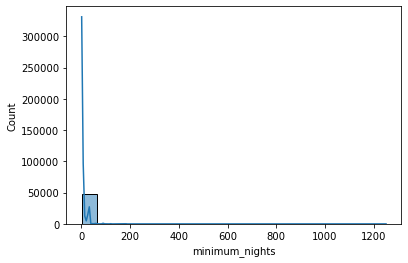

In [14]:
sns.histplot(sub_df['minimum_nights'], bins=20, kde = True) # shows extreme values for 'minimum_nights'

In [15]:
sub_df[sub_df['minimum_nights'] >365] # check how many extreme values

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1305,115.0,370,6,0.09,1,365
2854,400.0,1000,0,0.00,1,362
5767,180.0,1250,2,0.03,1,365
7355,134.0,500,30,0.57,1,90
8014,75.0,500,0,0.00,1,362
10829,199.0,480,0,0.00,1,365
11193,50.0,500,10,0.22,1,365
13404,99.0,999,2,0.07,1,42
14285,45.0,500,0,0.00,1,358
15946,250.0,366,0,0.00,1,365


In [16]:
sub_df = sub_df[sub_df['minimum_nights'] <365] 
# removing any stay data that have to stay beyond 365 days. Usually a contract would be in a yearly basis which is 365 days

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Count'>

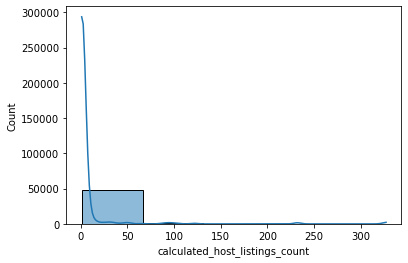

In [17]:
sns.histplot(sub_df['calculated_host_listings_count'], bins=5, kde = True) # shows extreme values for 'number_of_reviews'

In [18]:
sub_df[sub_df['calculated_host_listings_count'] >100] # check how many extreme values

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9740,169.0,30,3,0.09,121,364
10075,135.0,30,0,0.00,121,174
10335,369.0,30,0,0.00,121,364
10398,335.0,30,0,0.00,121,201
10490,129.0,30,3,0.07,121,161
...,...,...,...,...,...,...
48723,316.0,30,0,0.00,232,325
48724,385.0,30,0,0.00,232,338
48725,267.0,30,0,0.00,232,228
48726,278.0,30,0,0.00,232,188


In [19]:
sub_df = sub_df[sub_df['calculated_host_listings_count'] <100] 

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

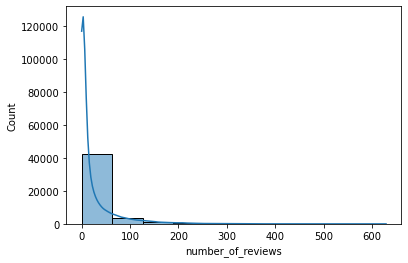

In [20]:
sns.histplot(sub_df['number_of_reviews'], bins=10, kde = True) # shows extreme values for 'number_of_reviews'

In [21]:
sub_df[sub_df['number_of_reviews'] >200] # check how many extreme values

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3,89.0,1,270,4.64,1,194
7,79.0,2,430,3.47,1,220
17,140.0,1,260,2.12,1,12
30,50.0,3,242,2.04,3,355
33,50.0,3,273,2.37,3,359
...,...,...,...,...,...,...
27649,52.0,1,207,10.38,6,325
27847,80.0,1,214,10.86,1,307
28651,50.0,1,341,17.82,3,25
29280,35.0,1,204,11.17,1,19


In [22]:
sub_df = sub_df[sub_df['number_of_reviews'] <200] 

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

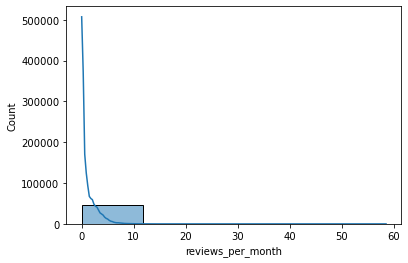

In [23]:
sns.histplot(sub_df['reviews_per_month'], bins=5, kde = True) # shows extreme values for 'number_of_reviews'

In [24]:
sub_df[sub_df['reviews_per_month'] >13] # check how many extreme values

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
36238,75.0,1,132,15.78,1,28
37093,20.0,1,111,13.11,1,41
38870,45.0,1,37,20.94,1,134
40025,100.0,1,86,13.30,8,335
40036,30.0,1,98,15.23,8,189
40297,67.0,1,95,15.32,8,145
41954,80.0,1,42,13.13,1,16
42075,100.0,1,156,58.50,9,299
42076,199.0,1,82,27.95,9,299
42077,100.0,1,38,14.62,9,295


In [25]:
sub_df = sub_df[sub_df['reviews_per_month'] <13] 

<AxesSubplot:xlabel='availability_365', ylabel='Count'>

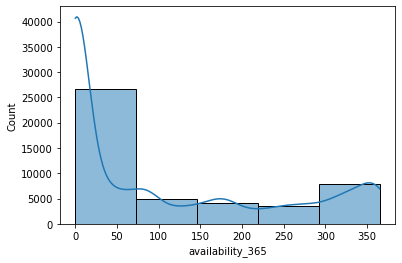

In [26]:
sns.histplot(sub_df['availability_365'], bins=5, kde = True) # shows extreme values for 'number_of_reviews'

In [27]:
sub_df.shape

(47246, 6)

### Elbow Technique

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [29]:
score = [kmeans[i].fit(sub_df).score(sub_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1593654928.3572156,
 -904098795.2000524,
 -546349749.7118777,
 -428328700.8136256,
 -358194943.41863406,
 -295026733.31133795,
 -254589115.6135148,
 -230488997.7339868,
 -213995419.40886545]

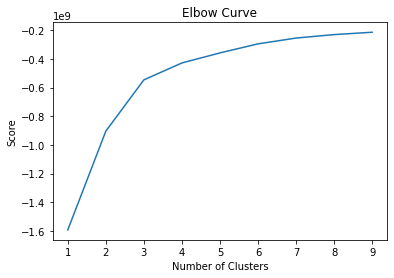

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### I am gonna choose 3 as the number of clusters this is because, this is the breaking point before the clusters are going flat

## Run the k-means algorithm

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [32]:
# Fit the k-means object to the data.

kmeans.fit(sub_df)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [33]:
sub_df['clusters'] = kmeans.fit_predict(sub_df)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [34]:
sub_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,149.0,1,9,0.21,6,365,0
1,225.0,1,45,0.38,2,355,0
2,150.0,3,0,0.00,1,365,0
4,80.0,10,9,0.10,1,0,1
5,200.0,3,74,0.59,1,129,1


In [35]:
sub_df['clusters'].value_counts()

1    30622
0    14307
2     2317
Name: clusters, dtype: int64

### 6. Visualizations using your clustered data

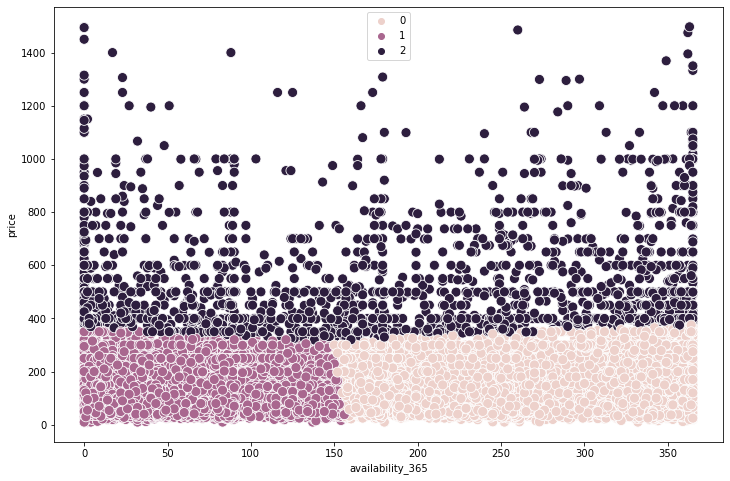

In [36]:
# Plot the clusters for the "Price" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_df['availability_365'], y=sub_df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('availability_365') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

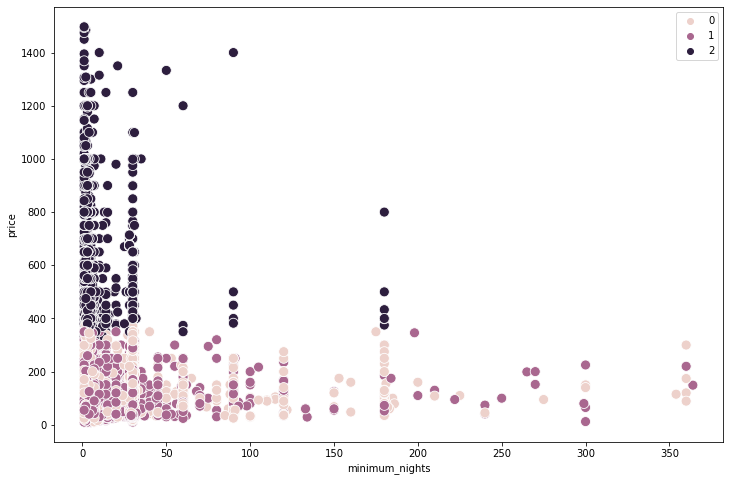

In [37]:
# Plot the clusters for the "Price" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_df['minimum_nights'], y=sub_df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('minimum_nights') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

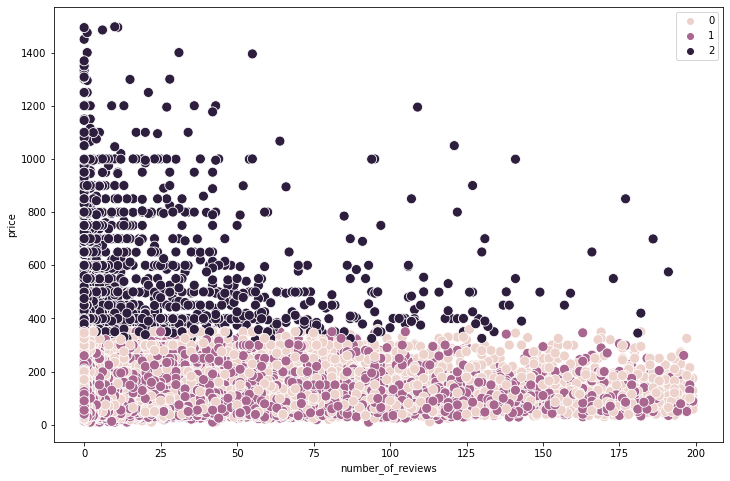

In [38]:
# Plot the clusters for the "Price" and "number_of_reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_df['number_of_reviews'], y=sub_df['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number_of_reviews') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

From the most part that I couldn't see much pattern. However, here is what I found 
- Most of listing in cluster 2 have a high price.
- the Majority of the listing in cluster 2 have a low number of minimum nights.
- Cluster 2 availability in 1 year varies in all the listings. However, Cluster 0 availability is only around 6 months and cluster 1 availability more than 6 months

In [39]:
sub_df.loc[sub_df['clusters'] == 2, 'cluster'] = 'dark purple'
sub_df.loc[sub_df['clusters'] == 1, 'cluster'] = 'purple'
sub_df.loc[sub_df['clusters'] == 0, 'cluster'] = 'pink'

In [40]:
sub_df.dtypes

price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
clusters                            int32
cluster                            object
dtype: object

In [41]:
sub_df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'reviews_per_month':['mean', 'median'],
                               'calculated_host_listings_count':['mean', 'median'], 
                              'availability_365':['mean', 'median'],})

price        minimum_nights        number_of_reviews         \
                   mean median           mean median              mean median   
cluster                                                                         
dark purple  547.157531  485.0       6.062149      3         13.724644      3   
pink         126.563702  105.0       9.414622      3         30.519536     10   
purple       117.984555  100.0       4.962217      2         16.209653      4   

            reviews_per_month        calculated_host_listings_count         \
                         mean median                           mean median   
cluster                                                                      
dark purple          0.910125   0.27                       3.921450      1   
pink                 1.371067   0.79                       6.924163      2   
purple               0.908402   0.26                       1.737542      1   

            availability_365         
                        mean median  
cluster                              
dark purple       160.767372    153  
pink              280.215349    297  
purple             24.678924      0

- In terms of the mean price of the cluster. Dark Purple has the highest listing price, whereas purple has the lowest listing price
Dark purple has the highest minimum nights, many reviews, the number of listing that the same host owns, and most of the listing in the cluster has the highest availability. It looks like this is the most popular cluster compared to the rest; the number of reviews can show this. Most of the hosts in these listings seem to own six homes on average, telling us that they could be experienced real estate investors and use Airbnb as their income. This cluster could also be more popular due to the availability of the listing on average; their listing is available for around nine months, which is more than the other cluster. Hence people would tend to choose listing from this cluster.
- Pink cluster is the second most popular cluster. However, the target market for this cluster would be high-class customers. This is because they have the most expensive listing compared to the rest, and also they rank second in terms of availability. They don’t have many reviews as dark purple. This is because their target customer is the only high-class customer. The host in this cluster also counts as real estate investors and user Airbnb as their income. However, these hosts seem to focus more on the high-class customer.
- Lastly, the purple cluster is the least popular. This is due to the lowest availability. The host in this cluster seems to be the host that needed extra income while they were away on holiday.


In the future I would focus more on dark purple and pink area. By getting to know this information it would be able to help us with our journey to find out what kind of listing earn the most revenue and what kind of characteristics of these listings that makes them to earn more revenue. Hence, we would be able to apply the same principles for our future listings.

In [42]:
sub_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cluster
0,149.0,1,9,0.21,6,365,0,pink
1,225.0,1,45,0.38,2,355,0,pink
2,150.0,3,0,0.00,1,365,0,pink
4,80.0,10,9,0.10,1,0,1,purple
5,200.0,3,74,0.59,1,129,1,purple


In [43]:
sub_df.to_excel(os.path.join(path, '02 Data','Prepared Data', 'cluster.xls'))

<ipython-input-43-93ea95fa7aca>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sub_df.to_excel(os.path.join(path, '02 Data','Prepared Data', 'cluster.xls'))
